In [1]:
from experiment_utils.toymodels import LGM

from sbi.analysis import pairplot
from sbi.inference.snle import SNLE_A

from fslm.snle import ReducablePosterior

In [3]:
# instantiate toy example
lgm = LGM()
prior = lgm.Prior

# draw observation and training samples
theta_o, x_o = lgm.sample_joint()
theta, x = lgm.sample_joint((5000,))

In [3]:
# learn neural likelihood estimate using a Mixture Density Network
inference = SNLE_A(prior, "mdn")
inference.append_simulations(theta, x).train()
snle_posterior = inference.build_posterior(sample_with="rejection")

# wrap posterior to add .marginalise_likelihood()
fslm_posterior = ReducablePosterior(snle_posterior)

 Training neural network. Epochs trained: 5

In [ ]:
# draw samples from the full likelihood-based posterior
samples = fslm_posterior.sample((1000,), x_o)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

                        may take a long time to collect the remaining 988
                        samples. Consider interrupting (Ctrl-C) and switching to
                        `sample_with='mcmc`.


(<Figure size 720x720 with 9 Axes>,
 array([[<AxesSubplot:xlabel='$\\theta_0$'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='$\\theta_1$'>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:xlabel='$\\theta_2$'>]], dtype=object))

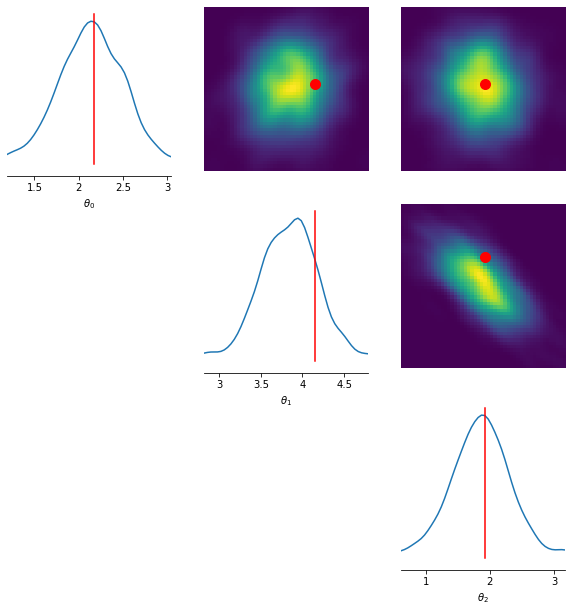

In [ ]:
pairplot(samples, points=theta_o, upper="kde", diag="kde", points_colors="red", labels=[r"$\theta_0$", r"$\theta_1$", r"$\theta_2$"])

In [ ]:
# marginalise likelihood and draw samples from the resulting posterior
fslm_posterior.marginalise_likelihood([0,2,3])
samples = fslm_posterior.sample((1000,), x_o)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

                        may take a long time to collect the remaining 976
                        samples. Consider interrupting (Ctrl-C) and switching to
                        `sample_with='mcmc`.


(<Figure size 720x720 with 9 Axes>,
 array([[<AxesSubplot:xlabel='$\\theta_0$'>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='$\\theta_1$'>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:xlabel='$\\theta_2$'>]], dtype=object))

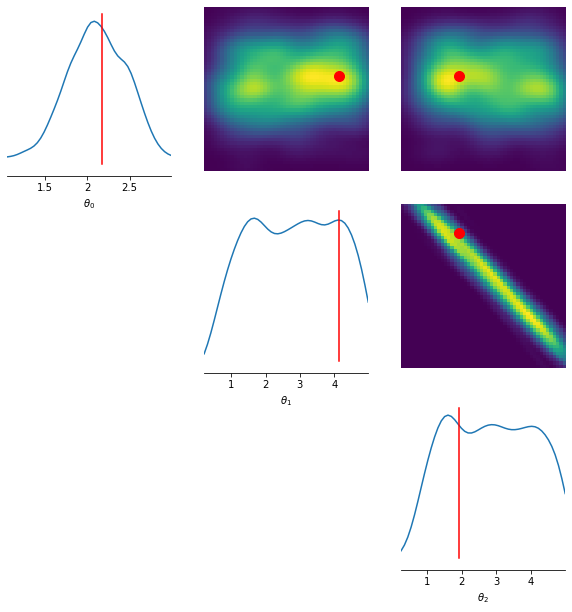

In [ ]:
pairplot(samples, points=theta_o, upper="kde", diag="kde", points_colors="red", labels=[r"$\theta_0$", r"$\theta_1$", r"$\theta_2$"])